In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

%matplotlib inline

import sys
sys.path.append('../')

from base.base_test import BaseTester
from data_loader.data_generator import DataGenerator
from models.BLSTM import BLSTM
from testers.tester import Tester
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
from utils import metrics
from tensorflow.contrib.layers import flatten

In [2]:
def combine_pred(config_file, subset, weights_path):
    """ Get the combined predictions for 3 runs
    Args:
        config_file: path to the Configuration file
        subset: 'train', 'dev', or 'test'
        weights_path: a string array holds the paths for each of the 3 runs.
    Returns:
        numpy array of size (3, 67500) for the 3 runs predictions 
        numpy array of size (67500,) for the ground truth

    """

    predictions = np.zeros((len(weights_path), 67500))
    
    for i in range(len(weights_path)):
        config = process_config(config_file)
        
        tf.reset_default_graph()
        sess = tf.Session()
        data = DataGenerator(config)
        model = BLSTM(config,data)
        model.load(sess,weights_path[i])
        
        tester = Tester(sess, model, data, config)
        
        ccc, loss, pred, gt = tester.test(subset)
        predictions[i,:] = pred[config['target_ccc']]
        
    return predictions, gt

## Predictinos on the 3 runs for clf model (arousal)

In [3]:
config_file = '../configs/clf_arousal_stage1.json'
subset = 'dev'
weights = ['../weights/clf_arousal_1/model-clf-1',
           '../weights/clf_arousal_2/model-clf-2',
           '../weights/clf_arousal_3/model-clf-3']

pred_clf_a, gt_a = combine_pred(config_file, subset, weights)

Weights = 4
loss10 added 1.0
loss8 added 1.0
loss6 added 1.0
loss4 added 1.0
Loading model checkpoint ../weights/clf_arousal_1/model-clf-1 ...

INFO:tensorflow:Restoring parameters from ../weights/clf_arousal_1/model-clf-1


  0%|          | 0/9 [00:00<?, ?it/s]

Model loaded


100%|██████████| 9/9 [00:22<00:00,  2.53s/it]


Weights = 4
loss10 added 1.0
loss8 added 1.0
loss6 added 1.0
loss4 added 1.0
Loading model checkpoint ../weights/clf_arousal_2/model-clf-2 ...

INFO:tensorflow:Restoring parameters from ../weights/clf_arousal_2/model-clf-2


  0%|          | 0/9 [00:00<?, ?it/s]

Model loaded


100%|██████████| 9/9 [00:23<00:00,  2.60s/it]


Weights = 4
loss10 added 1.0
loss8 added 1.0
loss6 added 1.0
loss4 added 1.0
Loading model checkpoint ../weights/clf_arousal_3/model-clf-3 ...

INFO:tensorflow:Restoring parameters from ../weights/clf_arousal_3/model-clf-3


  0%|          | 0/9 [00:00<?, ?it/s]

Model loaded


100%|██████████| 9/9 [00:23<00:00,  2.58s/it]


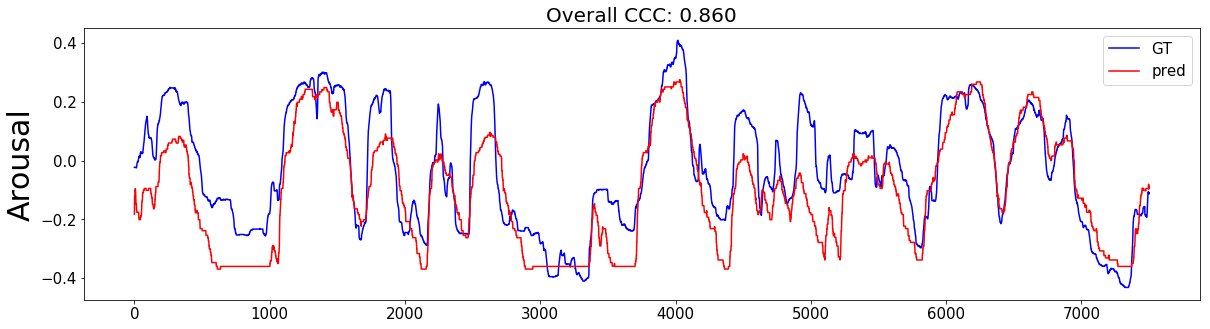

In [4]:
predctions = np.mean(pred_clf_a,axis=0)
plt.figure(figsize=(20,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(gt_a[:7500],'b',predctions[:7500],'r')
plt.legend(['GT','pred'], fontsize=15)
plt.ylabel('Arousal', fontsize=30)
plt.title('Overall CCC: %0.03f' % metrics.ccc(predctions, gt_a), fontsize=20)

## Predictinos on 1 run for clf model (valence)

In [5]:
config_file = '../configs/clf_valence_stage1.json'
subset = 'dev'
weights = ['../weights/clf_valence/model-279']

pred_clf_v, gt_v = combine_pred(config_file, subset, weights)

Weights = 4
loss10 added 1.0
loss8 added 1.0
loss6 added 1.0
loss4 added 1.0
Loading model checkpoint ../weights/clf_valence/model-279 ...

INFO:tensorflow:Restoring parameters from ../weights/clf_valence/model-279


  0%|          | 0/9 [00:00<?, ?it/s]

Model loaded


100%|██████████| 9/9 [00:14<00:00,  1.57s/it]


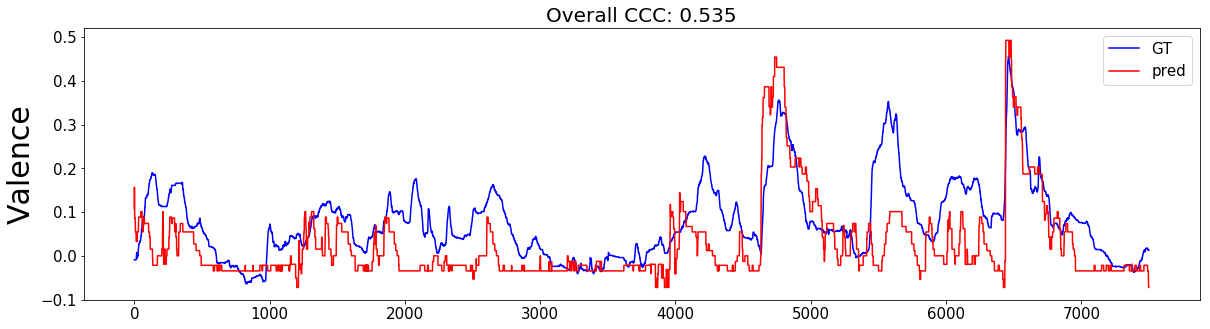

In [6]:
predctions = np.mean(pred_clf_v,axis=0)
plt.figure(figsize=(20,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(gt_v[:7500],'b',predctions[:7500],'r')
plt.legend(['GT','pred'], fontsize=15)
plt.ylabel('Valence', fontsize=30)
plt.title('Overall CCC: %0.03f' % metrics.ccc(predctions, gt_v), fontsize=20)

## Predictinos on 1 run for end to end model (arousal)

In [7]:
config_file = '../configs/endtoend_arousal_stage1.json'
subset = 'dev'
weights = ['../weights/endtoend_arousal/model-endtoend']

pred_endtoend_a, gt_a = combine_pred(config_file, subset, weights)

Weights = 5
loss10 added 0.5
loss8 added 0.5
loss6 added 0.5
loss4 added 0.5
rmse loss added 1.0
y_out ccc_err loss added 1.25
Loading model checkpoint ../weights/endtoend_arousal/model-endtoend ...

INFO:tensorflow:Restoring parameters from ../weights/endtoend_arousal/model-endtoend


  0%|          | 0/9 [00:00<?, ?it/s]

Model loaded


100%|██████████| 9/9 [00:32<00:00,  3.59s/it]


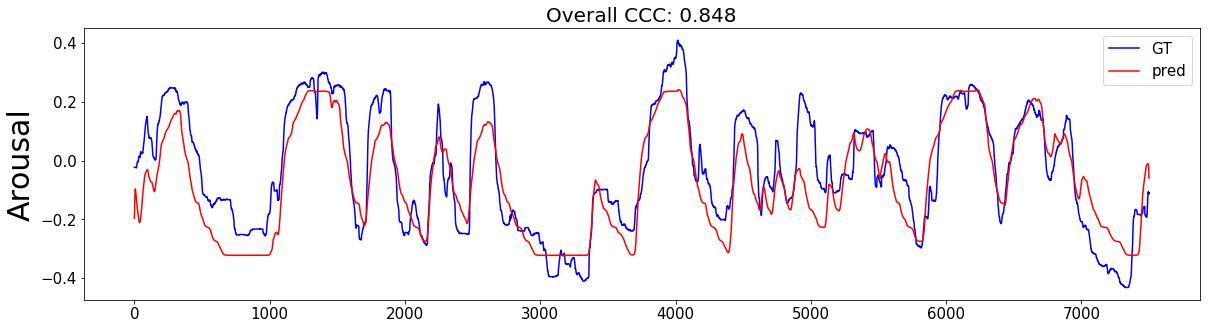

In [8]:
predctions = np.mean(pred_endtoend_a,axis=0)
plt.figure(figsize=(20,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(gt_a[:7500],'b',predctions[:7500],'r')
plt.legend(['GT','pred'], fontsize=15)
plt.ylabel('Arousal', fontsize=30)
plt.title('Overall CCC: %0.03f' % metrics.ccc(predctions, gt_a), fontsize=20)

## Predictinos on 1 run for end to end model (valence)

In [9]:
config_file = '../configs/endtoend_valence_stage1.json'
subset = 'dev'
weights = ['../weights/endtoend_valence/model-243']

pred_endtoend_v, gt_v = combine_pred(config_file, subset, weights)

Weights = 5
loss10 added 1.0
loss8 added 1.0
loss6 added 1.0
loss4 added 1.0
rmse loss added 0.25
y_out ccc_err loss added 1.375
Loading model checkpoint ../weights/endtoend_valence/model-243 ...

INFO:tensorflow:Restoring parameters from ../weights/endtoend_valence/model-243


  0%|          | 0/9 [00:00<?, ?it/s]

Model loaded


100%|██████████| 9/9 [00:23<00:00,  2.59s/it]


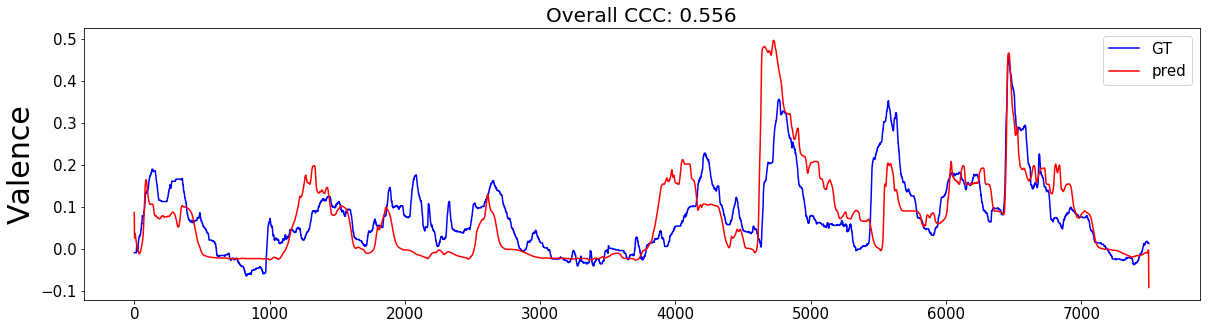

In [10]:
predctions = np.mean(pred_endtoend_v,axis=0)
plt.figure(figsize=(20,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(gt_v[:7500],'b',predctions[:7500],'r')
plt.legend(['GT','pred'], fontsize=15)
plt.ylabel('Valence', fontsize=30)
plt.title('Overall CCC: %0.03f' % metrics.ccc(predctions, gt_v), fontsize=20)